# 연속형 확률변수

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
from scipy import integrate
import warnings

# 적분에 관한 warning을 출력하지 않도록 한다
warnings.filterwarnings('ignore',
                        category=integrate.IntegrationWarning)

### 연속형 확률변수
- 확률변수가 취할 수 있는 값이 연속적인 확률변수
- 특정 값을 취하는 확률은 정의되지 않음
- 확률변수가 어느 구간에 들어가는 확률을 정의



- [예] 룰렛:

    - 취할 수 있는 값이 0부터 1사이의 실수
    - 큰 수일수록 나오기 쉬워지는 불공정한 구조
    - 0.5라는 값을 취할 확률은 0
    - 정확하게 0.5000000⋯을 취할 가능성은 없으므로 확률은 0

<img src="./1차원연속vs2차원연속.png" width="1000px" height="500px" >

## 1차원 연속형 확률변수

### 1차원 연속형 확률변수의 정의

In [3]:
x_range = np.array([0, 1])

In [4]:
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

In [5]:
X = [x_range, f]

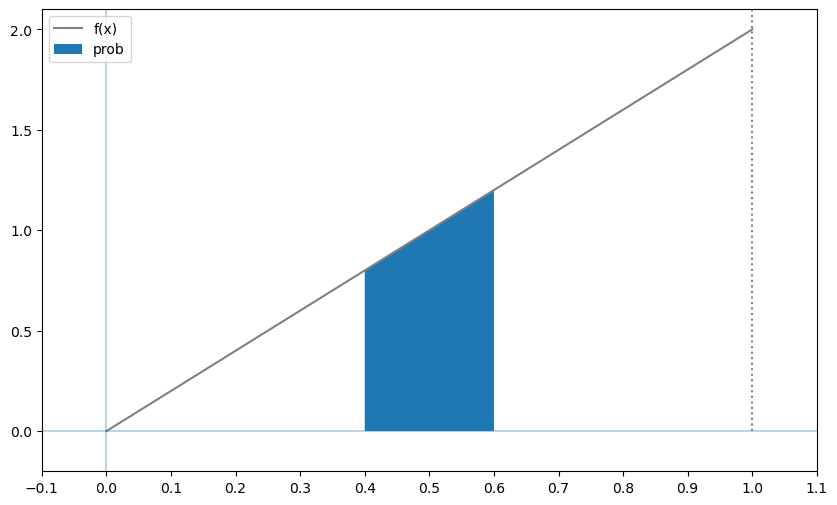

In [6]:
#밀도함수 f(x) 그래프 : 확률의 이미지를 전달하기위해 ,f(x)와 x축,두직선 0.4,0.6 영역에 색을 적용
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3) #t수평선

#수직선 (좌표 최대값)
ax.vlines(0, -0.2, 2.2, alpha=0.3) 
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4부터 0.6 까지 x좌표를 준비
xs = np.linspace(0.4, 0.6, 100)

# xs의 범위로 f(x)와 x축으로 둘러싸인 영역을 진하게 칠함
#위 두값의 처음과 마지막 데이터를 활용해서 사각형의 영역을 칠했다
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

- 확률 밀도 함수 표현
- f(x):확률밀도 함수를 나타내는 선이다.-> 변수의 각값에 대한 확률밀도다. 선 아래의 총명적은 1이다, 
- prob : 특정구간 (x축에서 0.4 ~0.6사이)에 대한 확률을 나타낸다 -> 해당 구간 내 변수 값 또는 확률
- 막대가 있는 구간은 확률의 관점에서 중요한 구간을 강조 , 구간 확률은 막대 높이에 비례해야 한다

In [7]:
# 첫 번째 인수는 피적분함수、두 번째 인수와 세 번째 인수는 적분 범위
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

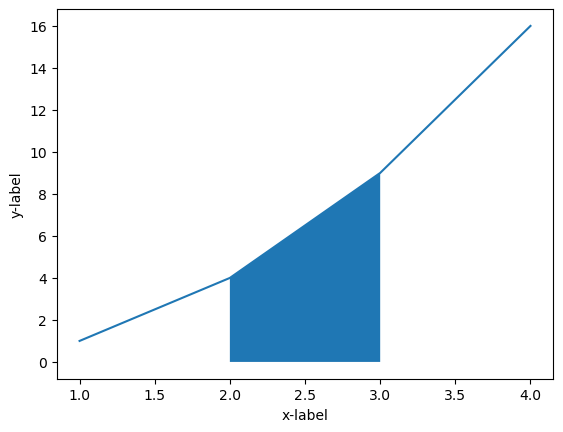

In [8]:
import matplotlib.pyplot as plt
x=[1,2,3,4]
y=[1,4,9,16]

plt.plot(x,y)
plt.xlabel("x-label")
plt.ylabel("y-label")
plt.fill_between(x,y,where=[(xi >=2 and xi<=3) for xi in x], label='prob')
plt.show()

In [9]:
# 함수의 최솟값은 fun이라는 인스턴스 변수에
#0을 반환하므로 첫번째 연속형 확률변수의 확률의 성질을 만족한다
from scipy.optimize import minimize_scalar #주어진 구간 내에서 함수의 최소값을 찾거나 무한대 또는 불특정한 구간에서 최소값 탐색

res = minimize_scalar(f)
res.fun

0

In [10]:
#def f(x):
#    return (x-2)*x*(x+2)**2
    
#f(10)    
#res = minimize_scalar(f)
#print("최소값 : ",res.fun)
#print("최소값을 가지는 x : ",res.x)
#print("최소값을 가지는가? : ",res.success)

### quad() : 수치적분 함수

- **수치적분(numerical integration)**은 함수를 아주 작은 구간으로 나누어 실제 면적을 계산함으로써 정적분의 값을 구하는 방법. 
- Scipy의 integrate 서브패키지의 quad 명령으로 수치적분을 할 수 있다.

- 첫 번째 인수는 피적분함수、두 번째 인수와 세 번째 인수는 적분 범위
- 첫번째 반환값이 수치 적분으로 얻어진 결과이며, 두번째의 값은 추정 오차

In [11]:
integrate.quad(f, -np.inf, np.inf)[0] #f(x)를 -무한대부터 무한대까지 적분한 결과가 1이어야 함

1.000

In [12]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [13]:
# 확률변수 x에 대해서 0.4~0.6에서 나올 확률은?
F(0.6) - F(0.4)

0.200

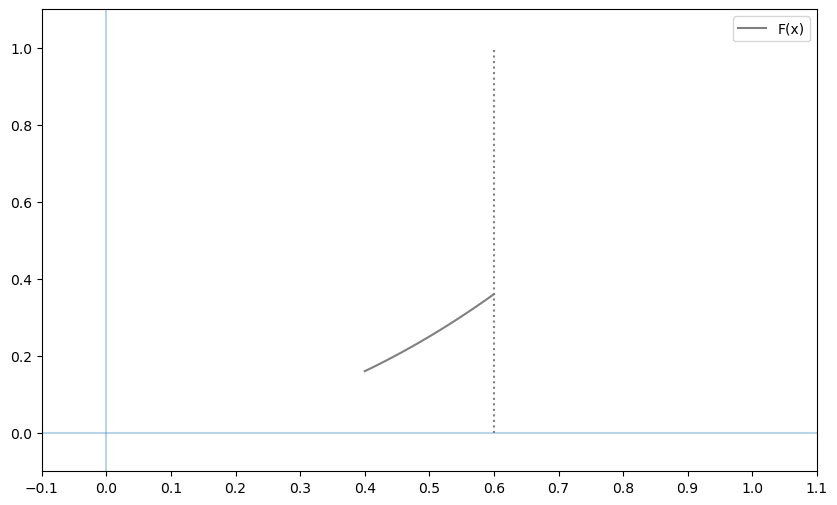

In [14]:
# 위 분포함수 F(x)를 그래프로 그려서 단조 증가함수(x가 증가할때 y는 감소하지 않는 함수)가 된다.
이xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

In [15]:
y_range = [3, 5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y - 3) / 2
    else:
        return 0
    
def G(y):
    return integrate.quad(g, -np.inf, y)[0]

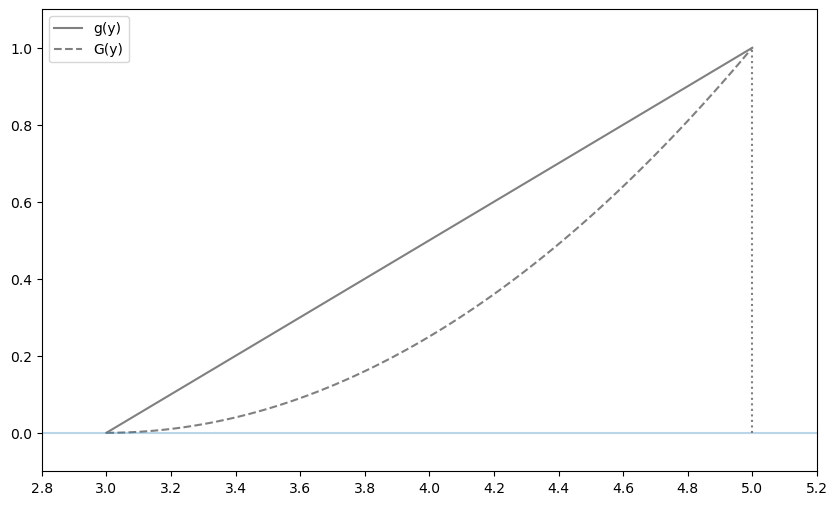

In [16]:
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys],
        label='g(y)', color='gray')
ax.plot(ys, [G(y) for y in ys],
        label='G(y)', ls='--', color='gray')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

### 1차원 연속형 확률분포의 지표

#### 평균

In [17]:
def integrand(x):
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

In [18]:
def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [19]:
E(X)

0.667

In [20]:
E(X, g=lambda x: 2*x+3)

4.333

In [21]:
2 * E(X) + 3

4.333

#### 분산

In [22]:
mean = E(X)
def integrand(x):
    return (x - mean) ** 2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [23]:
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [24]:
V(X)

0.056

In [25]:
V(X, lambda x: 2*x + 3)

0.222

In [26]:
2**2 * V(X)

0.222

## 2차원 연속형 확률분포

### ２차원 연속형 확률변수의 정의

In [27]:
x_range = [0, 2]
y_range = [0, 1]

In [28]:
#확률밀도 함수(pdf)
def f_xy(x, y):
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        return 4 * y * (x - y) #2d 공간에서 삼각형 영역 정의
    else:
        return 0  #영역외의 외부 확률이 0

In [29]:
XY = [x_range, y_range, f_xy] # x범위,y범위,함수 

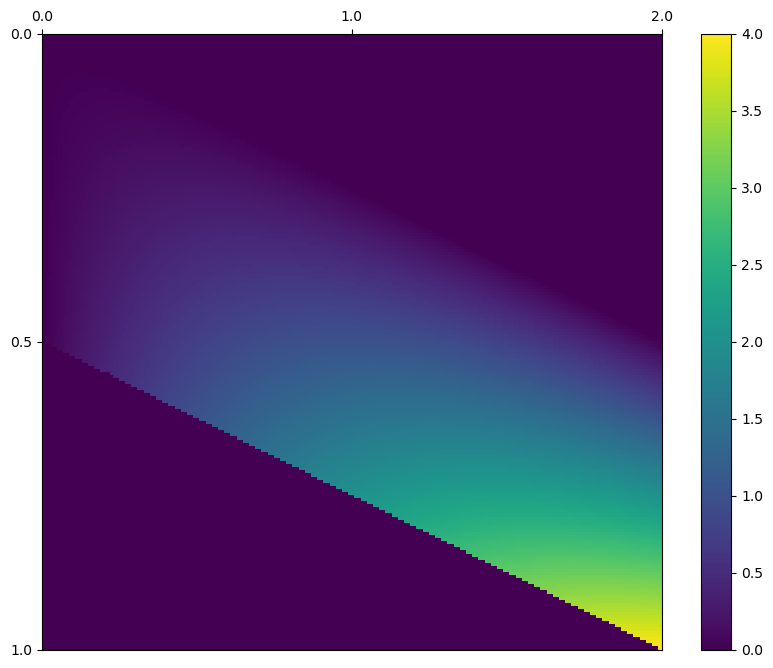

In [30]:
xs = np.linspace(x_range[0], x_range[1], 200) #x선형간격을 생성하겠다
ys = np.linspace(y_range[0], y_range[1], 200) #y선형간격을 생성하겠다
pd = np.array([[f_xy(x, y) for y in ys] for x in xs]) # x,y 포인트 생성한 값을 f_xy(x,y)pdf값을 계산하고 2d 배열로 리턴

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd) # 2d 배열에 값을 의사 색상 컬러 플랏으로 생성하겠다

#x,y의 눈금 표시하겠다
ax.set_xticks(np.linspace(0, 200, 3), minor=False)
ax.set_yticks(np.linspace(0, 200, 3), minor=False)

#xy의 레이블 작성하겠다 -> 값의 범위에 해당한다
ax.set_xticklabels(np.linspace(0, 2, 3))
ax.set_yticklabels(np.linspace(0, 1, 3))

ax.invert_yaxis() #y축을 반전시키고
ax.xaxis.tick_top() #x축 눈금을 플랏 상단에 배치한다 -> 행렬에 대한 이미지

fig.colorbar(c, ax=ax) #pdf값의 스케일 표현
plt.show()

- PDF: xy 평면의 특정영역 내에서만 0이 아님을 보여 준다.
- PDF 동작 :  x-y가 증가함에 따라서 값이 감소한다. -> 4y(x-y)와 일치해야 한다. => x=y 또는 y=0일 때 PDF가 0이고 정의된 영역에서 y,x-y가 증가함에 따라 PDF가 증가한다
- 정규화 : xy평면에 대한 적분은 1과 같아야 한다
- 주변 분포 : x,y에 대한 한계 분포를 찾는다 -> 결합 pdf를 다른 변수와 통합한다 -> x의 주변 pdf를 찾으려면, y의 모든값에 대해 fxy(x,y)를 적분하고 y에 대해서도 적분한다.

결론 : pdf는 특정영역 내에 임의 변수가 포함될 가능성을 정의한다  
       밝은 색상은 더 높은 확률을 나타내고 pdf 내에서는 특정결과가 다른 결과보다 더 가능성이 높다

scipy.integrate.nquad(func, ranges, args=None, opts=None, full_output=False)

Returns:  

    resultfloat
    The result of the integration.

    abserrfloat
    The maximum of the estimates of the absolute error in the various integration results.

    out_dictdict, optional
    A dict containing additional information on the integration.

In [31]:
# 첫 번째 인수는 피적분함수、두 번째 인수는 x의 적분구간과 y의 적분구간
#전체 범위에 걸쳐서 f_xy함수를 통합한다
integrate.nquad(f_xy,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0] #결과 첫번째 요소인 적분값에 엑세스 하는데 사용

(1.000, 0.000)

In [32]:
from functools import partial #함수인수의 일부를 고정시켜 새 함수를 함수를 생성
#f_x에서 x인수를 고정하고 integrate.quad 함수가 y에 대해서만 통합하도록 하여 x의 한계 pdf를 계산한다

def f_X(x):
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0]

#x에 대한 통합을 위해 y인수를 고정한다. y한계 pdf를 계산한다
def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0]

In [33]:
X = [x_range, f_X]
Y = [y_range, f_Y]

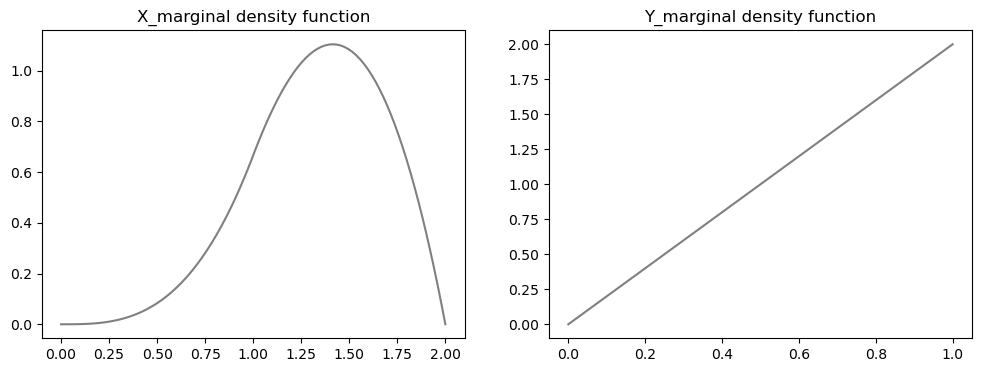

In [34]:
xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xs, [f_X(x) for x in xs], color='gray')
ax2.plot(ys, [f_Y(y) for y in ys], color='gray')
ax1.set_title('X_marginal density function')
ax2.set_title('Y_marginal density function')

plt.show()

x에 대한 한계밀도 : 균일하지 않다, 1.25~1.50 사이에서 peak다 이 지점에서 멀어질수록 확률밀도가 낮다,중심경향
y에 대한 한계밀도 : 해당 범위에서 데이터가 0~1까지 균일하게 펼쳐져있다. 이 범위 내에서 모든값이 발생할 가능성이 높다

### ２차원 연속형 확률변수의 지표

#### 기댓값

In [35]:
# x * f_xy(x, y) -> 적분함수를 생성 : x의 기대값을 계산하기 위한 피적분자
def integrand(x, y):
    return x * f_xy(x, y)

#적분함수를 다시 적분
integrate.nquad(integrand,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0] #확률변수 x의 기대값(평균)

1.333

In [53]:
def y_integrand(x, y):
    return y * f_xy(x, y)

#적분함수를 다시 적분
integrate.nquad(y_integrand,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0] #확률변수 x의 기대값(평균)

0.667

In [36]:
# g(함수) 지정을 해서 2차원 연속확률 변수의 다양한 함수의 기대값을 확인 해 보자 
# x,y 평균은 g(x,y)가 각각 x,y의 특정 값이다
def E(XY, g):
    x_range, y_range, f_xy = XY
    def integrand(x, y):
        return g(x, y) * f_xy(x, y)
    
    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

In [37]:
# x의 기대값은 xy 터플과 x에 대한 항등함수를 나타내는 람다를 함수 E에 전달하면서 게산된다
mean_X = E(XY, lambda x, y: x)
mean_X

1.333

In [38]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

0.667

In [39]:
# 통계 속성을 값전달을 한후 확인 해보자
a, b = 2, 3 # 무작위 변수의 선형 조합에 대한 계수

In [40]:
E(XY, lambda x, y: a*x + b*y) #확률변수 x,y의 선형 결합의 기대값을 계산 ax+by

4.667

In [41]:
a * mean_X + b * mean_Y # 각각의 평균값으로 선형 결합의 기대값을 계산

4.667

#### 분산

In [42]:
# 무작위 변수가 가지고 있는 변수'X'의 분산을 계산하자 '적분함수' mean_X에서 X의 제곱편차를 정의하고 결과[f_xy(x, y)] pdf를 곱한다
# 전체 확률 공간에 걸쳐서 적분하여 'x' 분산인 편차제곱의 기대값을 찾자
def integrand(x, y):
    return (x - mean_X)**2 * f_xy(x, y)

integrate.nquad(integrand,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0] # x의 분산

0.111

In [52]:
def y_integrand(x, y):
    return (y - mean_Y)**2 * f_xy(x, y)

integrate.nquad(y_integrand,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0] # y의 분산

0.056

In [43]:
#v는 'f_xy(x, y)'에 대한 g(x,y)의 분산을 계산하는 함수
def V(XY, g):
    x_range, y_range, f_xy = XY
    mean = E(XY, g)
    def integrand(x, y):
        return (g(x, y) - mean)**2 * f_xy(x, y) #평균값의 제곱차이를 계산하는 '적분함수'를 정의

    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0] #적분함수의 분산을 찾는다

In [44]:
#x의 분산은 x(g(x,y)=x)를 반환하는 람다함수에 v함수에 전달해서 계산된다
var_X = V(XY, lambda x, y: x)
var_X

0.111

In [45]:
#y의 분산은 x(g(x,y)=y)를 반환하는 람다함수에 v함수에 전달해서 계산된다
var_Y = V(XY, lambda x, y: y)
var_Y

0.056

In [46]:
def Cov(XY):
    x_range, y_range, f_xy = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    def integrand(x, y):
        return (x-mean_X) * (y-mean_Y) * f_xy(x, y) #각 평균 편차의 곱을 pdf 계산하는 적분

    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

#공분산은 모든 x,y에 대한 '적분함수'의 적분이다

In [47]:
cov_xy = Cov(XY)
cov_xy #x와 y사이의 공분산

0.056

In [48]:
V(XY, lambda x, y: a*x + b*y)

1.611

In [49]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

1.611

In [50]:
cov_xy / np.sqrt(var_X * var_Y)

0.707